In [1]:
from welly import Location
from welly import Well
import pandas as pd

In [2]:
BTA0327 = Well()
BTA0327.uwi = 'BTA0327'
BTA0327.header

,original_mnemonic,mnemonic,unit,value,descr,section
0,UWI,UWI,None,BTA0327,None,header


In [3]:
survey = pd.read_csv('BTA0327 Survey.csv')
print(survey)

      MD   INC    AZIM Course Length
0      0  0.00    0.00       Invalid
1   1043  0.44   53.75          1043
2   1087  0.36  349.62            44
3   1127  0.28  342.98            40
4   1208  0.00    4.62            81
5   1248  0.07  181.29            40
6   1329  0.30  303.90            81
7   1409  0.29  335.10            80
8   1490  0.47  334.69            81
9   1571  0.26  330.34            81
10  1651  0.44  309.95            80
11  1732  0.18  327.53            81
12  1812  0.48  356.75            80
13  1905  0.18   26.15            93
14  1991  0.05  149.07            86
15  2072  0.19  280.95            81
16  2159  0.09  290.88            87
17  2245  0.34  284.79            86
18  2332  0.18  302.13            87
19  2419  0.23  299.36            87
20  2547  0.47    7.58           128
21  2680  0.21   58.82           133
22  2807  0.11  105.98           127
23  2940  0.20   36.92           133
24  3066  0.21   32.72           126
25  3199  0.22   54.66           133
2

In [4]:
survey_subset = survey[['MD', 'INC', 'AZIM']]
print(survey_subset)

      MD   INC    AZIM
0      0  0.00    0.00
1   1043  0.44   53.75
2   1087  0.36  349.62
3   1127  0.28  342.98
4   1208  0.00    4.62
5   1248  0.07  181.29
6   1329  0.30  303.90
7   1409  0.29  335.10
8   1490  0.47  334.69
9   1571  0.26  330.34
10  1651  0.44  309.95
11  1732  0.18  327.53
12  1812  0.48  356.75
13  1905  0.18   26.15
14  1991  0.05  149.07
15  2072  0.19  280.95
16  2159  0.09  290.88
17  2245  0.34  284.79
18  2332  0.18  302.13
19  2419  0.23  299.36
20  2547  0.47    7.58
21  2680  0.21   58.82
22  2807  0.11  105.98
23  2940  0.20   36.92
24  3066  0.21   32.72
25  3199  0.22   54.66
26  3320  0.24  281.64
27  3441  0.15    3.20
28  3562  0.24  323.69


In [5]:
#Add deviation data to a well
BTA0327.location.add_deviation(survey_subset.values)

In [6]:
#View first five rows of the data
BTA0327.location.position[:5]

array([[   0.        ,    0.        ,    0.        ],
       [   3.22965969,    2.36808446, 1042.98974839],
       [   3.34100042,    2.60395206, 1086.98887202],
       [   3.28975054,    2.82101582, 1126.98824629],
       [   3.23181828,    3.01026739, 1207.98792388]])

In [7]:
x_loc = BTA0327.location.position[:,0]
y_loc = BTA0327.location.position[:,1]
z_loc = BTA0327.location.position[:,2]

Text(0.5, 1.0, 'Y Location vs TVD')

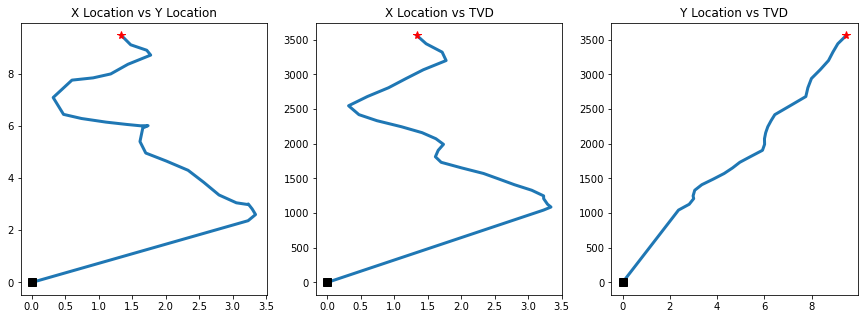

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,5))
ax1 = plt.subplot2grid(shape=(1,3), loc=(0,0))
ax2 = plt.subplot2grid(shape=(1,3), loc=(0,1))
ax3 = plt.subplot2grid(shape=(1,3), loc=(0,2))

ax1.plot(x_loc, y_loc, lw=3)
ax1.plot(x_loc[0], y_loc[0], marker='s', color='black', ms=8)
ax1.plot(x_loc[-1], y_loc[-1], marker='*', color='red', ms=8)
ax1.set_title('X Location vs Y Location')

ax2.plot(x_loc, z_loc, lw=3)
ax2.plot(x_loc[0], z_loc[0], marker='s', color='black', ms=8)
ax2.plot(x_loc[-1], z_loc[-1], marker='*', color='red', ms=8)
#ax2.invert_yaxis()
ax2.set_title('X Location vs TVD')

ax3.plot(y_loc, z_loc, lw=3)
ax3.plot(y_loc[0], z_loc[0], marker='s', color='black', ms=8)
ax3.plot(y_loc[-1], z_loc[-1], marker='*', color='red', ms=8)
#ax3.invert_yaxis()
ax3.set_title('Y Location vs TVD')



C:\Users\acaudill\AppData\Local\Temp/ipykernel_9412/3220238990.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])
C:\Users\acaudill\AppData\Local\Temp/ipykernel_9412/3220238990.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


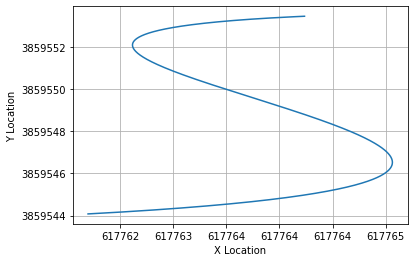

In [9]:
# Create a trajectory of regularly sampled points
UTM_EASTING = 617761.98
UTM_NORTHING = 3859544.19

location_data = BTA0327.location.trajectory(datum=[UTM_EASTING, UTM_NORTHING, 0], elev=False)
xs = location_data[:,0]
ys = location_data[:,1]
zs = location_data[:,2]
plt.plot(xs, ys)
plt.xlabel('X Location')
plt.ylabel('Y Location')
plt.ticklabel_format(style='plain')
plt.grid()

# after plotting the data, format the labels
current_values = plt.gca().get_xticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.show()


C:\Users\acaudill\AppData\Local\Temp/ipykernel_9412/3998099839.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])
C:\Users\acaudill\AppData\Local\Temp/ipykernel_9412/3998099839.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


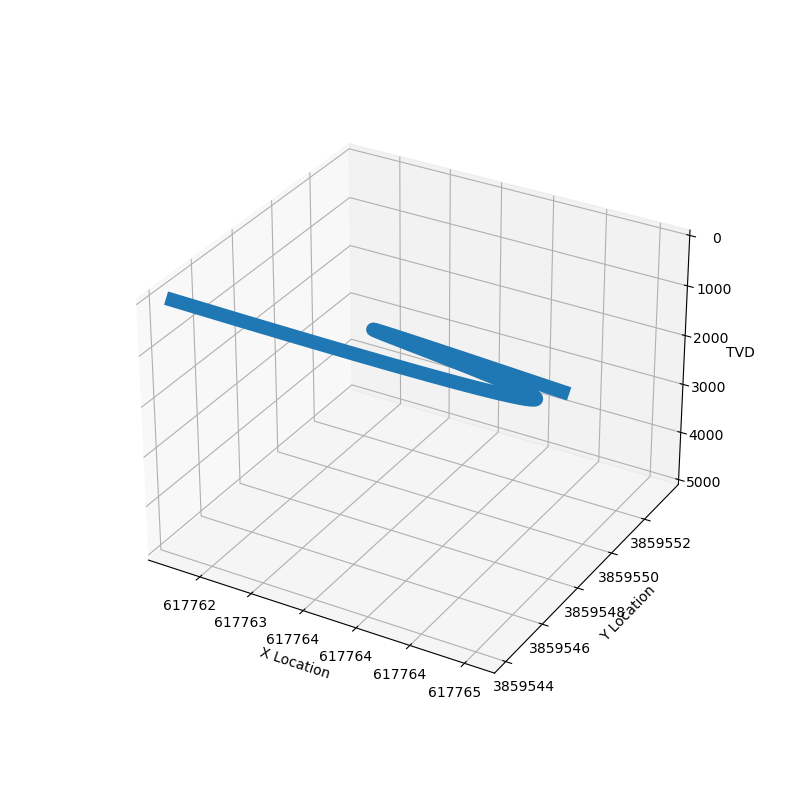

In [10]:
from mpl_toolkits.mplot3d import Axes3D
# Enable 3D Ploting
%matplotlib widget
fig = plt.figure(figsize=(8, 8))

ax = plt.axes(projection='3d')
ax.plot3D(xs, ys, zs, lw=10)
ax.set_zlim(5000, 0)

ax.set_xlabel('X Location')
ax.set_ylabel('Y Location')
ax.set_zlabel('TVD')

plt.ticklabel_format(style='plain')

# after plotting the data, format the labels
current_values = plt.gca().get_xticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.show()